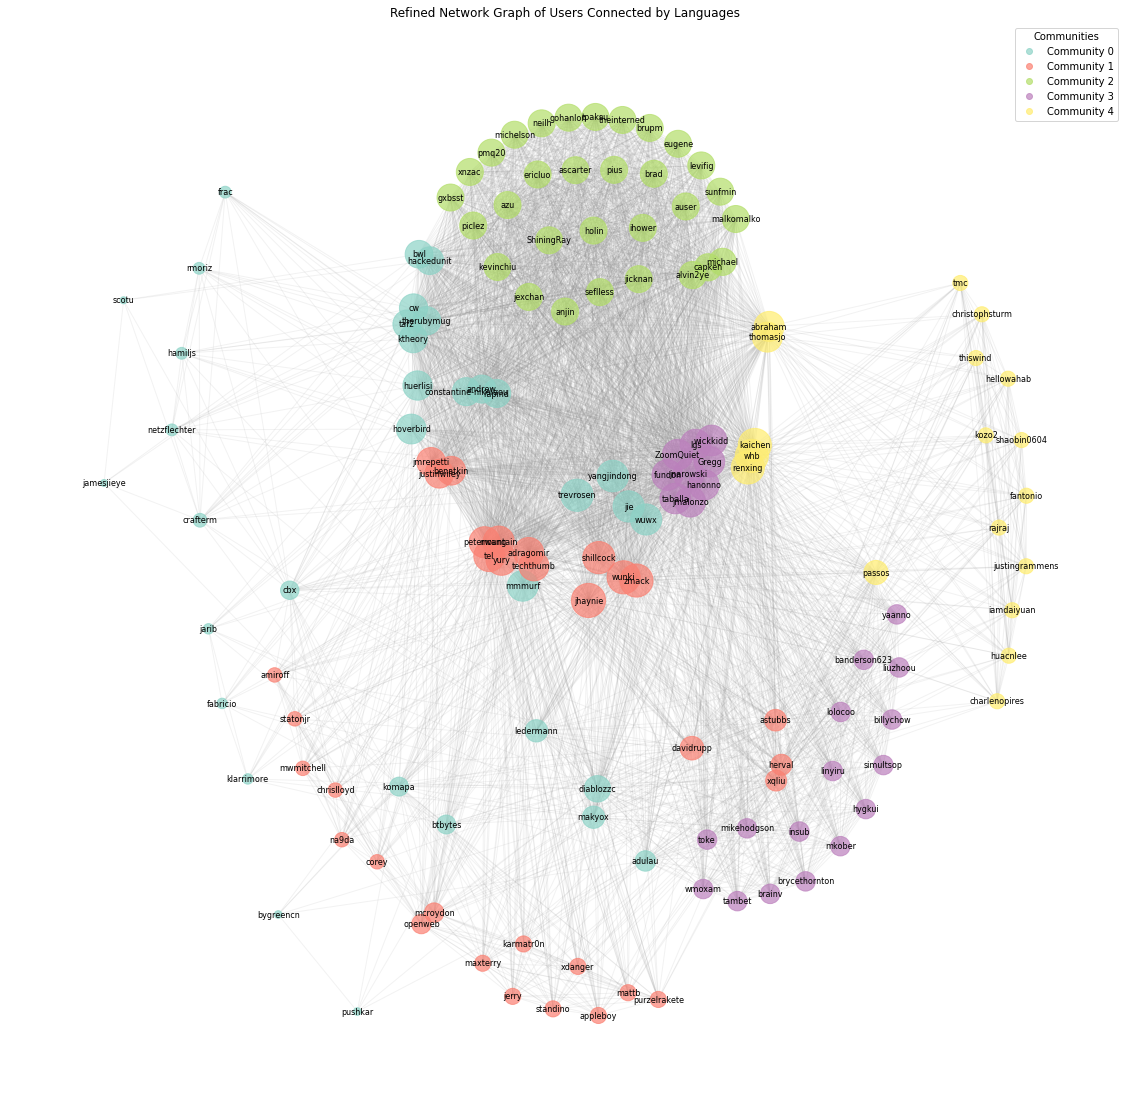

<Figure size 432x288 with 0 Axes>

In [25]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import networkx.algorithms.community as nx_comm
from itertools import combinations

# Load the dataset
data = pd.read_csv('merged_data_project2_2.csv')

# Prepare data
data['Languages'] = data['Languages'].fillna('').apply(lambda x: set(x.strip() for x in str(x).split(',')))

# Target languages
target_languages = {'Vue','Clojure','Gherkin','Nginx', 'Mustache','Lex','ApacheConf','Kotlin','ProcFile','Puppet','Scala','haskell','CoffeeScript'}

# Create a graph
G2 = nx.Graph()

# Adding nodes and edges with control over connections
for (idx1, row1), (idx2, row2) in combinations(data.iterrows(), 2):
    if row1['Location'] != 'False' and row2['Location'] != 'False' and row1['Follower'] != row2['Follower']:  # Exclude 'False' locations
        shared_languages = row1['Languages'].intersection(row2['Languages'], target_languages)
        if shared_languages:  # Only connect users if they share any target language
            G2.add_edge(row1['Follower'], row2['Follower'], weight=len(shared_languages))

# Community detection
partition = nx_comm.greedy_modularity_communities(G2)  # Using a different community detection algorithm
community_map = {node: cid for cid, community in enumerate(partition) for node in community}

# Set node size based on degree with a smaller multiplier
node_sizes = [10 * G2.degree(n) for n in G2]  # Adjust the multiplier to reduce size

# Layout
pos = nx.kamada_kawai_layout(G2)  # This layout might provide a better spread of nodes
plt.figure(figsize=(20, 20))

# Draw nodes
nodes = nx.draw_networkx_nodes(G2, pos, node_size=node_sizes, node_color=[community_map[n] for n in G2], cmap=plt.cm.Set3, alpha=0.7)

# Draw edges with lighter color and reduced opacity
nx.draw_networkx_edges(G2, pos, edge_color='gray', alpha=0.1)  # Light gray edges with reduced opacity

# Draw labels
nx.draw_networkx_labels(G2, pos, font_size=8)

# Create legend for communities
legend_labels = {cid: f'Community {cid}' for cid, _ in enumerate(partition)}
plt.legend(handles=nodes.legend_elements()[0], labels=legend_labels.values(), title="Communities")

plt.title('Refined Network Graph of Users Connected by Languages')
plt.axis('off')
plt.show()
plt.savefig('community_network_graph_final.png',format="PNG")

In [26]:
# Print the communities
for i, community in enumerate(partition):
    print(f"Community {i+1}: {community}")

Community 1: frozenset({'crafterm', 'adulau', 'taf2', 'huerlisi', 'btbytes', 'cbx', 'frac', 'ktheory', 'pushkar', 'constantine-nikolaou', 'andrew', 'hoverbird', 'makyox', 'trevrosen', 'klarrimore', 'bygreencn', 'fabricio', 'hamiljs', 'yangjindong', 'diablozzc', 'komapa', 'scotu', 'bwl', 'jarib', 'wuwx', 'jamesjieye', 'netzflechter', 'ledermann', 'rapind', 'therubymug', 'jie', 'hackedunit', 'cw', 'mmmurf', 'rmoriz'})
Community 2: frozenset({'xdanger', 'chrislloyd', 'karmatr0n', 'jerry', 'herval', 'xqliu', 'appleboy', 'standino', 'benatkin', 'mountain', 'purzelrakete', 'justinwiley', 'yury', 'jmrepetti', 'davidrupp', 'openweb', 'adragomir', 'mcroydon', 'mwmitchell', 'techthumb', 'jhaynie', 'shillcock', 'zmack', 'peterwang', 'tel', 'statonjr', 'astubbs', 'mattb', 'wunki', 'na9da', 'amiroff', 'maxterry', 'corey'})
Community 3: frozenset({'gxbsst', 'anjin', 'levifig', 'piclez', 'eugene', 'brupm', 'auser', 'pius', 'pmq20', 'brad', 'seflless', 'sunfmin', 'tpaksu', 'ascarter', 'malkomalko', 'c

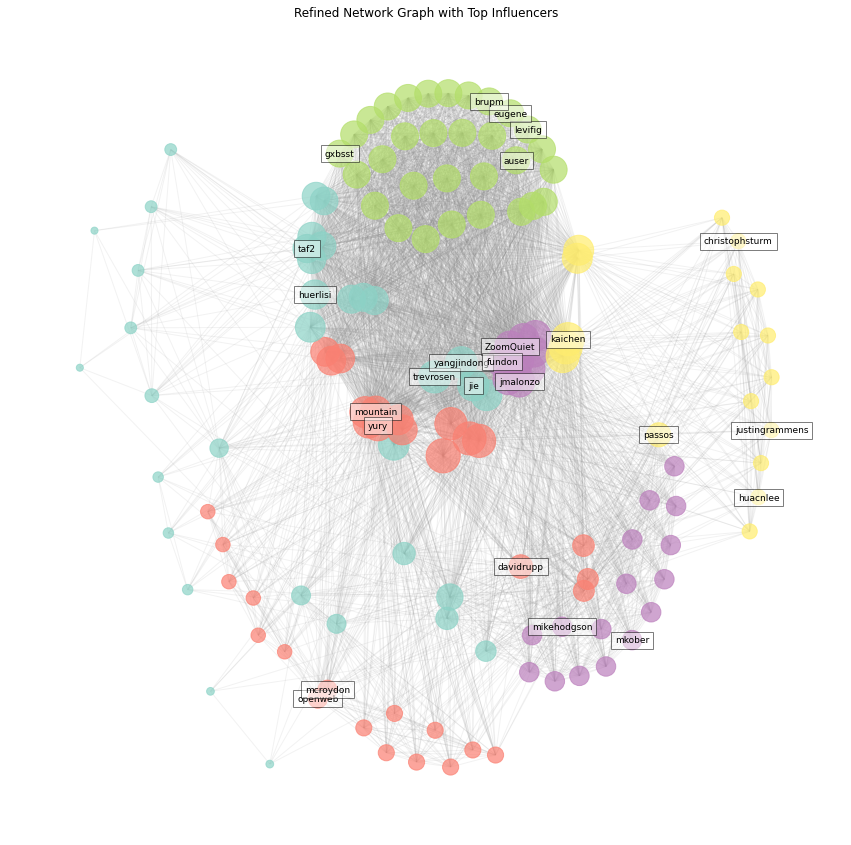

<Figure size 432x288 with 0 Axes>

In [27]:
# Plot the main graph
plt.figure(figsize=(15, 15))

# Draw nodes
nx.draw_networkx_nodes(G2, pos, node_size=node_sizes, node_color=[community_map[n] for n in G2], cmap=plt.cm.Set3, alpha=0.7)

# Draw edges
nx.draw_networkx_edges(G2, pos, edge_color='gray', alpha=0.1)

# Identify and label influencers within each community
for community_id, community_nodes in enumerate(partition):
    # Subgraph of the community
    community_subgraph = G2.subgraph(community_nodes)
    
    # Calculate node centrality (you can use different centrality measures based on your requirement)
    node_centrality = nx.degree_centrality(community_subgraph)
    
    # Sort nodes by centrality
    sorted_nodes = sorted(node_centrality, key=node_centrality.get, reverse=True)
    
    # Select top influencers (e.g., top 5)
    top_influencers = sorted_nodes[:5]
    
    # Add labels for top influencers in the community
    for influencer in top_influencers:
        # Check if influencer is present in the main graph
        if influencer in G2:
            # Position of the influencer node
            influencer_pos = pos[influencer]
            # Add label for the influencer
            plt.text(pos[influencer][0], pos[influencer][1], influencer, fontsize=9, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))

# Title for the graph
plt.title('Refined Network Graph with Top Influencers')
plt.axis('off')
plt.show()
plt.savefig('influencer_graph_final.png',format="PNG")


In [28]:
# Identify and label influencers within each community
for community_id, community_nodes in enumerate(partition):
    # Subgraph of the community
    community_subgraph = G2.subgraph(community_nodes)
    
    # Calculate node centrality (you can use different centrality measures based on your requirement)
    node_centrality = nx.degree_centrality(community_subgraph)
    
    # Sort nodes by centrality
    sorted_nodes = sorted(node_centrality, key=node_centrality.get, reverse=True)
    
    # Select top influencers (e.g., top 5)
    top_influencers = sorted_nodes[:5]
    
    # Print influencers for the community
    print(f'Community {community_id + 1} Top Influencers:')
    for rank, influencer in enumerate(top_influencers, start=1):
        print(f'{rank}. {influencer}')
    

Community 1 Top Influencers:
1. trevrosen
2. huerlisi
3. yangjindong
4. jie
5. taf2
Community 2 Top Influencers:
1. mountain
2. yury
3. davidrupp
4. openweb
5. mcroydon
Community 3 Top Influencers:
1. gxbsst
2. levifig
3. eugene
4. brupm
5. auser
Community 4 Top Influencers:
1. mikehodgson
2. ZoomQuiet
3. fundon
4. mkober
5. jmalonzo
Community 5 Top Influencers:
1. huacnlee
2. christophsturm
3. justingrammens
4. passos
5. kaichen


In [24]:
# Display degree centrality of community influencers
print("Degree centrality of community influencers:")
for influencer, centrality in list(community_influencers_degree_centrality.items())[:6]:
    print(f"{influencer}: {centrality}")
    #if len(community_influencers_degree_centrality) >= 5:
        #break

Degree centrality of community influencers:
trevrosen: 0.8529411764705882
huerlisi: 0.8235294117647058
yangjindong: 0.7352941176470588
jie: 0.6764705882352942
taf2: 0.6470588235294118
mountain: 1.0
